---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
EMC = pd.read_csv("Employee_Movie_Choices.txt", sep="\t")

In [3]:
B = nx.from_pandas_dataframe(EMC, "#Employee", "Movie")

In [4]:
B.edges(data=True)

[('Andy', 'Anaconda', {}),
 ('Andy', 'Mean Girls', {}),
 ('Andy', 'The Matrix', {}),
 ('Anaconda', 'Claude', {}),
 ('Anaconda', 'Georgia', {}),
 ('Mean Girls', 'Joan', {}),
 ('Mean Girls', 'Lee', {}),
 ('The Matrix', 'Frida', {}),
 ('The Matrix', 'Pablo', {}),
 ('Claude', 'Monty Python and the Holy Grail', {}),
 ('Claude', 'Snakes on a Plane', {}),
 ('Monty Python and the Holy Grail', 'Georgia', {}),
 ('Snakes on a Plane', 'Georgia', {}),
 ('Frida', 'The Shawshank Redemption', {}),
 ('Frida', 'The Social Network', {}),
 ('The Shawshank Redemption', 'Pablo', {}),
 ('The Shawshank Redemption', 'Vincent', {}),
 ('The Social Network', 'Vincent', {}),
 ('Joan', 'Forrest Gump', {}),
 ('Joan', 'Kung Fu Panda', {}),
 ('Forrest Gump', 'Lee', {}),
 ('Kung Fu Panda', 'Lee', {}),
 ('Pablo', 'The Dark Knight', {}),
 ('Vincent', 'The Godfather', {})]

In [5]:
B.nodes(data=True)

[('Andy', {}),
 ('Anaconda', {}),
 ('Mean Girls', {}),
 ('The Matrix', {}),
 ('Claude', {}),
 ('Monty Python and the Holy Grail', {}),
 ('Snakes on a Plane', {}),
 ('Frida', {}),
 ('The Shawshank Redemption', {}),
 ('The Social Network', {}),
 ('Georgia', {}),
 ('Joan', {}),
 ('Forrest Gump', {}),
 ('Kung Fu Panda', {}),
 ('Lee', {}),
 ('Pablo', {}),
 ('The Dark Knight', {}),
 ('Vincent', {}),
 ('The Godfather', {})]

In [6]:
def answer_one():
        
    EMC = pd.read_csv("Employee_Movie_Choices.txt", sep="\t")
    B = nx.from_pandas_dataframe(EMC, "#Employee", "Movie")
    
    
    
    return B

In [7]:
answer_one()

In [8]:
nx.set_node_attributes(B, 'type','movie')

In [9]:
B.nodes(data=True)

[('Andy', {'type': 'movie'}),
 ('Anaconda', {'type': 'movie'}),
 ('Mean Girls', {'type': 'movie'}),
 ('The Matrix', {'type': 'movie'}),
 ('Claude', {'type': 'movie'}),
 ('Monty Python and the Holy Grail', {'type': 'movie'}),
 ('Snakes on a Plane', {'type': 'movie'}),
 ('Frida', {'type': 'movie'}),
 ('The Shawshank Redemption', {'type': 'movie'}),
 ('The Social Network', {'type': 'movie'}),
 ('Georgia', {'type': 'movie'}),
 ('Joan', {'type': 'movie'}),
 ('Forrest Gump', {'type': 'movie'}),
 ('Kung Fu Panda', {'type': 'movie'}),
 ('Lee', {'type': 'movie'}),
 ('Pablo', {'type': 'movie'}),
 ('The Dark Knight', {'type': 'movie'}),
 ('Vincent', {'type': 'movie'}),
 ('The Godfather', {'type': 'movie'})]

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [10]:
def answer_two():
    
    B = answer_one()
    for node in B.nodes():
        if node in employees:
            B.add_node(node, type="employee")
        else:
            B.add_node(node, type="movie")
    
    return B

In [17]:
answer_one()

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [14]:
def answer_three():
        
    # Your Code Here
    
    return bipartite.weighted_projected_graph(answer_one(), employees)

<IPython.core.display.Javascript object>


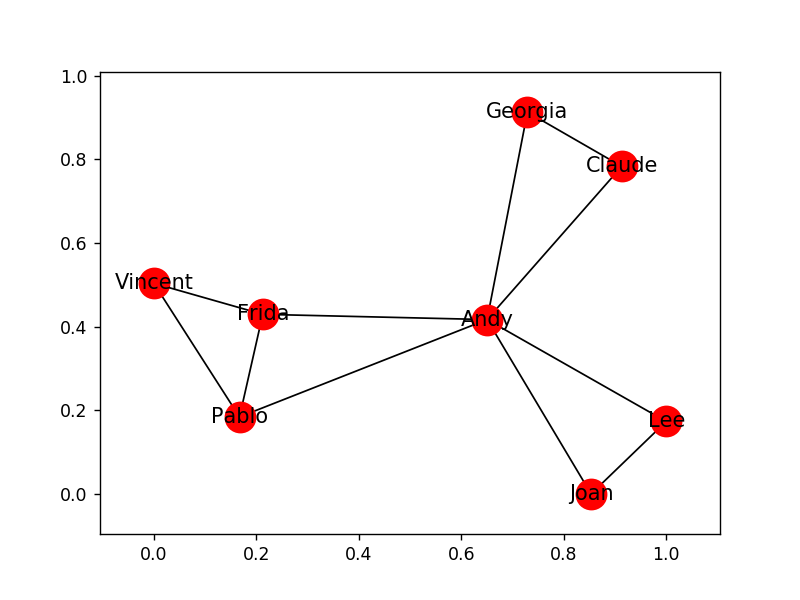

In [18]:
#plot_graph(answer_three())

In [39]:
ER = pd.read_csv("Employee_Relationships.txt", sep="\t", header=None, names=["A","B","C"])

In [40]:
ER

,A,B,C
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10
5,Andy,Pablo,-10
6,Andy,Vincent,20
7,Claude,Frida,0
8,Claude,Georgia,90
9,Claude,Joan,0


In [69]:
NM1 = pd.DataFrame(answer_three().edges(data=True), columns=['A', 'B', 'outcome'])
NM2 = pd.DataFrame(answer_three().edges(data=True), columns=['B', 'A', 'outcome'])

In [70]:
NM = pd.concat([NM1, NM2])

In [71]:
NM

,A,B,outcome
0,Andy,Pablo,{'weight': 1}
1,Andy,Claude,{'weight': 1}
2,Andy,Joan,{'weight': 1}
3,Andy,Lee,{'weight': 1}
4,Andy,Frida,{'weight': 1}
5,Andy,Georgia,{'weight': 1}
6,Pablo,Frida,{'weight': 2}
7,Pablo,Vincent,{'weight': 1}
8,Claude,Georgia,{'weight': 3}
9,Joan,Lee,{'weight': 3}


In [72]:
NM['W'] = NM['outcome'].map(lambda x: x['weight'])

In [73]:
NM

,A,B,outcome,W
0,Andy,Pablo,{'weight': 1},1
1,Andy,Claude,{'weight': 1},1
2,Andy,Joan,{'weight': 1},1
3,Andy,Lee,{'weight': 1},1
4,Andy,Frida,{'weight': 1},1
5,Andy,Georgia,{'weight': 1},1
6,Pablo,Frida,{'weight': 2},2
7,Pablo,Vincent,{'weight': 1},1
8,Claude,Georgia,{'weight': 3},3
9,Joan,Lee,{'weight': 3},3


In [74]:
df = pd.merge(ER, NM, how='left', left_on=["A","B"], right_on=["A","B"])

In [75]:
df.W.fillna(0, inplace=True)

In [76]:
df

,A,B,C,outcome,W
0,Andy,Claude,0,{'weight': 1},1.0
1,Andy,Frida,20,{'weight': 1},1.0
2,Andy,Georgia,-10,{'weight': 1},1.0
3,Andy,Joan,30,{'weight': 1},1.0
4,Andy,Lee,-10,{'weight': 1},1.0
5,Andy,Pablo,-10,{'weight': 1},1.0
6,Andy,Vincent,20,NaN,0.0
7,Claude,Frida,0,NaN,0.0
8,Claude,Georgia,90,{'weight': 3},3.0
9,Claude,Joan,0,NaN,0.0


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [77]:
df[['C','W']].corr()

,C,W
C,1.000000,0.788396
W,0.788396,1.000000


In [78]:
df['C'].corr(df['W'])

0.7883962221733477

In [79]:
def answer_four():
        
    # Your Code Here
    
    return df['C'].corr(df['W'])

In [80]:
answer_four()

0.7883962221733477